<a href="https://colab.research.google.com/github/IsaiGowthami/Excelr_Assignments/blob/main/logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATA EXPLORATION
# load and inspect the datasets
import pandas as pd

test_df=pd.read_csv('/content/Titanic_test.csv')
train_df=pd.read_csv('/content/Titanic_train.csv')

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#DAtA PREPROCESSING
#handling missing values
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)


<ipython-input-7-066cf17005d9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
<ipython-input-7-066cf17005d9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [ ]:
train_df.drop(['Name','Ticket','PassengerId','Cabin'],axis=1, inplace=True)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.drop(['Name','Ticket','PassengerId','Cabin'],axis=1, inplace=True)

In [ ]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
train_df['Pclass'].unique()

array([3, 1, 2])

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# le.fit(train_df['Sex'])
# train_df['Sex']=le.transform(train_df['Sex'])

train_df=pd.get_dummies(train_df,columns=['Sex'],drop_first=False,dtype=int)
test_df=pd.get_dummies(test_df,columns=['Sex'],drop_first=False,dtype=int)

train_df=pd.get_dummies(train_df,columns=['Pclass'],drop_first=False,dtype=int)
test_df=pd.get_dummies(test_df,columns=['Pclass'],drop_first=False,dtype=int)

In [ ]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,35.0,1,0,53.1000,S,1,0,1,0,0
4,0,35.0,0,0,8.0500,S,0,1,0,0,1


In [ ]:
# le.fit(test_df['Sex'])
# test_df['Sex']=le.transform(test_df['Sex'])

In [ ]:
test_df.head()

,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,Q,0,1,0,0,1
1,47.0,1,0,7.0000,S,1,0,0,0,1
2,62.0,0,0,9.6875,Q,0,1,0,1,0
3,27.0,0,0,8.6625,S,0,1,0,0,1
4,22.0,1,1,12.2875,S,1,0,0,0,1


In [ ]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
train_df=pd.get_dummies(train_df,columns=['Embarked'],drop_first=False,dtype=int)
test_df=pd.get_dummies(test_df,columns=['Embarked'],drop_first=False,dtype=int)

In [ ]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [ ]:
test_df.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_df[['Age','Fare']]=sc.fit_transform(train_df[['Age','Fare']])
test_df[['Age','Fare']]=sc.fit_transform(test_df[['Age','Fare']])

In [ ]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.565736,1,0,-0.502445,0,1,0,0,1,0,0,1
1,1,0.663861,1,0,0.786845,1,0,1,0,0,1,0,0
2,1,-0.258337,0,0,-0.488854,1,0,0,0,1,0,0,1
3,1,0.433312,1,0,0.420730,1,0,1,0,0,0,0,1
4,0,0.433312,0,0,-0.486337,0,1,0,0,1,0,0,1


In [ ]:
#3. Model Building--defining the features x and target y for training
x_train=train_df.drop('Survived', axis=1)
y_train=train_df['Survived']

In [ ]:
#train the logistic regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#4. Model Evaluation
x_test=test_df
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,auc
import matplotlib.pyplot as plt
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train1,x_val,y_train1,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [ ]:
y_prediction=lr.predict(x_val)

In [ ]:
#evaluate the model
accuracy=accuracy_score(y_val,y_prediction)
precision=precision_score(y_val,y_prediction)
recall=recall_score(y_val,y_prediction)
f1=f1_score(y_val,y_prediction)
roc_auc=roc_auc_score(y_val,y_prediction)

print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1_score:',f1)
print('roc_auc_score:',roc_auc)

accuracy: 0.8100558659217877
precision: 0.7857142857142857
recall: 0.7432432432432432
f1_score: 0.7638888888888888
roc_auc_score: 0.8001930501930502


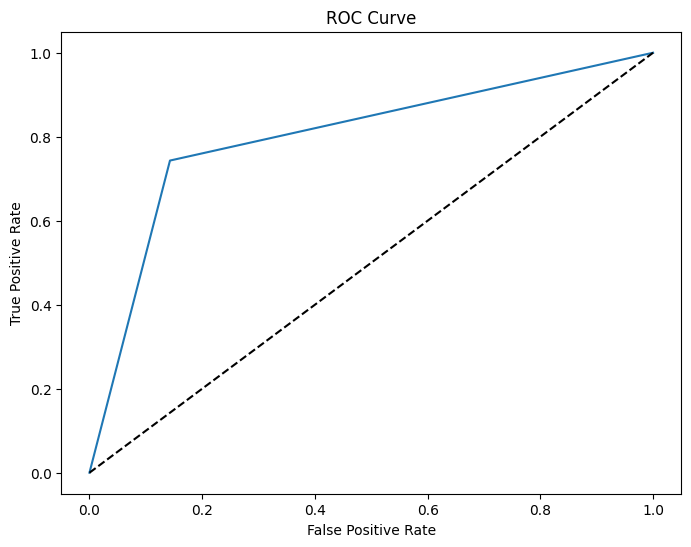

In [ ]:
#plot ROC curve
fpr, tpr, thresholds=roc_curve(y_val,y_prediction)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f'Roc Curve(AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--',label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
#plt.legend(;oc='lower right')
plt.show()

In [ ]:
#Interpretation
coefficients=pd.DataFrame(lr.coef_[0],index=x_train.columns,columns=['Coefficient'])
print(coefficients)

            Coefficient
Age           -0.481888
SibSp         -0.314564
Parch         -0.089892
Fare           0.133937
Sex_female     1.417050
Sex_male      -1.236892
Pclass_1       1.026285
Pclass_2       0.171915
Pclass_3      -1.018043
Embarked_C     0.225843
Embarked_Q     0.156041
Embarked_S    -0.201727


Gender: The most crucial factor for survival. Females had a much higher chance of surviving than males.

Passenger Class: Class had a strong influence; those in first class were more likely to survive, while those in third class had lower survival rates.

Age: Older passengers were less likely

to survive.
Siblings/Spouses and Fare: These factors had a more moderate effect.

Embarkation Port: The least significant of the features, but it still played a role.

In [ ]:
import joblib

In [ ]:
joblib.dump(lr,'titanic_model.pkl')

['titanic_model.pkl']

In [ ]:
joblib.dump(sc,'titanic_scaler.pkl')

['titanic_scaler.pkl']

In [ ]:
from google.colab import files
files.download('titanic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('titanic_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>